In [34]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import plotly.express as px

import matplotlib.pyplot as plt



In [35]:
galaxies = pd.read_csv("galaxies.csv")

In [36]:
galaxies

,X,Y
0,6.649504,2.223293
1,5.260232,-7.556045
2,6.164551,9.245618
3,5.033345,9.002009
4,3.674350,-7.836118
...,...,...
995,4.963106,-7.547204
996,6.147833,-8.742696
997,4.722672,9.892131
998,6.333305,2.750708


In [37]:
galaxies.describe()

,X,Y
count,1000.000000,1000.000000
mean,5.633007,1.667349
std,1.094495,7.484249
min,1.913593,-11.305422
25%,4.910362,-7.556082
50%,5.603967,3.517958
75%,6.342865,8.882848
max,9.160857,13.612304


In [38]:
fig = px.scatter(x=galaxies.X, y=galaxies.Y)
fig.show()

In [39]:
#find the rightmost planet in the uppermost galaxy
#split data in groups

In [40]:
points = galaxies.values

In [49]:
x =np.where(points==max(points[:,0]))

In [50]:
coordinates = points[x]
coordinates = [round(el,2) for el in coordinates]
coordinates

[9.16]

In [43]:
model = KMeans(n_clusters=3)
model = model.fit(points)
labels = model.labels_


In [44]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i])
        elif labels[i] == 1:
            data_1.append(points[i])
        else:
            data_2.append(points[i])


    # YOUR CODE HERE
    
    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 = separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(334, 2)
(333, 2)
(333, 2)


In [45]:
#means of y values to prove which galaxy is on top
print(data_0[:,1].mean())
print(data_1[:,1].mean())
print(data_2[:,1].mean())
#data 2 is on top

9.6816300418546
-8.190932498458086
3.487282546246737


In [46]:
x = np.where(data_0==max(data_0[:,0]))

In [48]:
#solution
coordinates = data_0[x]
coordinates = [round(el,2) for el in coordinates]
coordinates

[9.16]

No handles with labels found to put in legend.


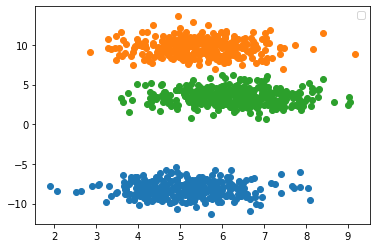

In [23]:
#plot all points
plt.scatter(x=data_0[:,0],y=data_0[:,1])
plt.scatter(x=data_1[:,0],y=data_1[:,1])
plt.scatter(x=data_2[:,0],y=data_2[:,1])
plt.legend()
plt.show()

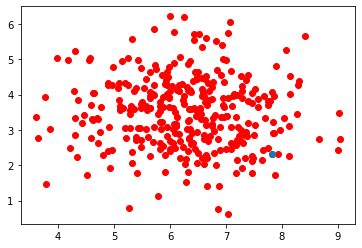

In [24]:
#plot galaxy in top
plt.scatter(data_2[:,0],data_2[:,1],  c= "red", label="0")
#plot rightmost point in this galaxy
plt.scatter(data_2[62][0],data_2[62][1])


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4fdc1fa5-6f26-4ec2-b2d3-ce107e824e55' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>